### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5

#### Дисциплина: Интеллектуальный анализ данных

##### Студент: Матюхин Григорий Васильевич
##### Группа: НПИбд-01-21

## Москва 2024
***

### Вариант №20 

- Yeast Data Set 
- Название файла: yeast.data 
- Ссылка: http://archive.ics.uci.edu/ml/datasets/Yeast 
- Класс: localization site (столбец No 10) 
- Метод отбора признаков – отбор на основе важности признаков (ExtraTreesClassifier) 
- Модели классификации: 
    - классификатор ближайших соседей (к-во соседей = 3) 
    - классификатор ближайших соседей (к-во соседей = 5) 
    - классификатор LDA 
- Кривая для визуализации - ROC-кривая 

## 1. Загружаем датасет

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
yeast = fetch_ucirepo(id=110) 

In [2]:
yeast["data"].keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

In [3]:
yeast["data"]["features"].keys()

Index(['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc'], dtype='object')

In [4]:
KLASS = "localization_site"

In [5]:
data = yeast["data"]["features"].copy()
data[KLASS] = yeast["data"]["targets"][KLASS]

## 2. Понижение количества меток до 2-х

In [6]:
import numpy as np

In [7]:
unique = data[KLASS].unique()
unique

array(['MIT', 'NUC', 'CYT', 'ME1', 'EXC', 'ME2', 'ME3', 'VAC', 'POX',
       'ERL'], dtype=object)

In [8]:
import matplotlib.pyplot as plt

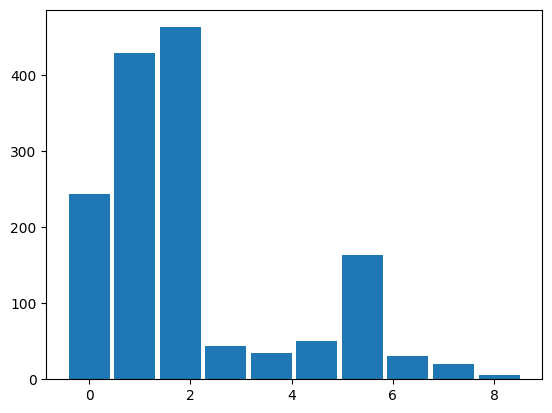

In [9]:
elements = list(unique)
data[KLASS] = data[KLASS].apply(lambda x: elements.index(x))

counts, edges, bars = plt.hist(data[KLASS], bins=len(unique), rwidth=0.9, align='left')

In [10]:
import random
import collections
hist = collections.Counter(data[KLASS])

best_score = float('inf')
best_yes = []
best_no = []
for _ in range(100000):
    yes = []
    no = []
    for k, v in hist.items():
        if random.random() < 0.5:
            yes.append(k)
        else:
            no.append(k)
        
    score = sum(hist[k] for k in yes) - sum(hist[k] for k in no)

    if abs(score) < abs(best_score):
        print(score)
        best_score = score
        best_yes = yes
        best_no = no
        
    if score == 0:
        break

yes = best_yes
no = best_no
print(sum(hist[k] for k in yes), sum(hist[k] for k in no))
yes, no

-344
112
-110
26
-10
0
742 742


([0, 1, 3, 8, 9], [2, 4, 5, 6, 7])

In [11]:
data["klass"] = data[KLASS].apply(lambda x: 1 if x in yes else 0)

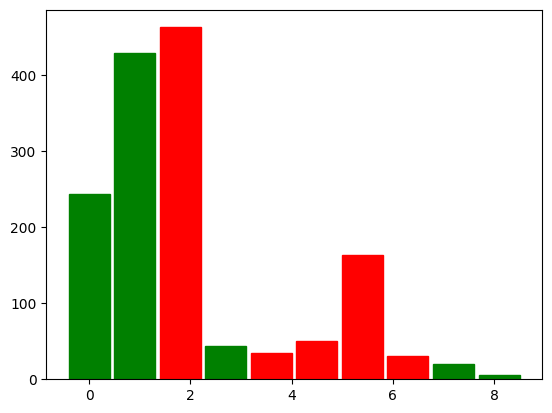

In [12]:
counts, edges, bars = plt.hist(data[KLASS], bins=len(elements), rwidth=0.9, align='left')
for k, b in zip(elements, bars):
    k = elements.index(k)
    if k in yes:
        b.set_color('green')
    else:
        b.set_color('red')

In [13]:
data[KLASS] = data["klass"]
data = data.drop(["klass"], axis=1)
data

,mcg,gvh,alm,mit,erl,pox,vac,nuc,localization_site
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,1
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,1
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,1
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,1
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,1
...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,0
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,1
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,0
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,1


## 3. Удаляем текстовые признаки

In [14]:
data

,mcg,gvh,alm,mit,erl,pox,vac,nuc,localization_site
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,1
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,1
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,1
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,1
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,1
...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,0
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,1
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,0
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,1


Все признаки -- числовые. Ничего не удаляем.

## 4. Стандартизируем

In [15]:
data_kls = data[KLASS]
data = (data - data.mean()) / data.std()
data[KLASS] = data_kls
data

,mcg,gvh,alm,mit,erl,pox,vac,nuc,localization_site
0,0.581785,0.888182,-0.346528,-0.956880,-0.097557,-0.099098,-0.344059,-0.527741,1
1,-0.510719,1.372348,-0.231148,0.064290,-0.097557,-0.099098,0.521044,-0.527741,1
2,1.018787,0.968876,-0.115769,-0.810999,-0.097557,-0.099098,0.521044,-0.527741,1
3,0.581785,-0.483623,0.807270,-0.956880,-0.097557,-0.099098,0.694064,-0.527741,1
4,-0.583552,-0.483623,-0.231148,2.033690,-0.097557,-0.099098,-0.344059,-0.527741,1
...,...,...,...,...,...,...,...,...,...
1479,2.256958,0.968876,-0.808048,-0.665117,-0.097557,-0.099098,0.521044,-0.527741,0
1480,-0.219384,-0.564317,1.268790,1.012519,-0.097557,-0.099098,-0.344059,1.819885,1
1481,1.237287,0.565405,-1.615707,-0.519236,-0.097557,-0.099098,1.040106,-0.527741,0
1482,-0.510719,-0.806400,1.153410,-0.738058,-0.097557,-0.099098,0.521044,1.068645,1


## 5. Отбираем признаки

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
X = data.drop([KLASS], axis=1)
y = data[KLASS]
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

ExtraTreesClassifier(random_state=0)

In [17]:
clf.score(X, data[KLASS])

1.0

In [18]:
most_val = -1
second_val = -1
most_important = -1
second_important = -1
for (i,v) in enumerate(clf.feature_importances_):
    print(i, v)
    if v > most_val:
        second_important = most_important
        most_important = i
        second_val = most_val
        most_val = v
(most_important, most_val), (second_important, second_val)

0 0.16610763143155294
1 0.1675227176652874
2 0.1879462237767841
3 0.1966296886807222
4 0.0048491667635963635
5 0.008813307157818974
6 0.14328354170284802
7 0.12484772282139003


((3, np.float64(0.1966296886807222)), (2, np.float64(0.1879462237767841)))

In [19]:
FEAT1, FEAT2 = X.keys()[most_important], X.keys()[second_important]
FEAT1, FEAT2

('mit', 'alm')

In [20]:
len(data[FEAT1].unique()) > 10, len(data[FEAT2].unique()) > 10

(True, True)

## 6. Визуализация

Text(0.5, 1.0, 'yeast')

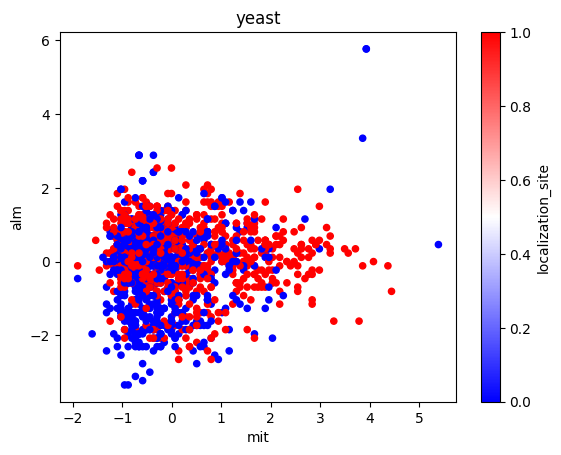

In [21]:
data.plot.scatter(FEAT1, FEAT2, c=KLASS, cmap='bwr')
plt.title("yeast")

## 7. Создаем модели классификации

In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3)
test

,mcg,gvh,alm,mit,erl,pox,vac,nuc,localization_site
710,2.038457,1.210960,-1.154187,-0.738058,-0.097557,-0.099098,2.251250,-0.527741,1
931,-0.365051,0.000544,0.807270,0.210172,-0.097557,-0.099098,-1.036142,-1.560697,0
146,0.654619,-0.160845,-0.000389,-0.883939,-0.097557,-0.099098,-0.863121,-0.246026,0
225,0.581785,0.484710,-0.577288,-1.029821,-0.097557,-0.099098,0.175003,-0.527741,1
963,-0.292218,-1.209872,2.191828,-0.592176,-0.097557,-0.099098,-3.458430,-0.246026,0
...,...,...,...,...,...,...,...,...,...
825,0.144784,-0.322234,0.691890,-0.446295,-0.097557,-0.099098,0.001982,-0.527741,0
882,-1.020554,-0.160845,-0.000389,-0.956880,-0.097557,-0.099098,-0.171039,3.040651,1
278,0.144784,0.323321,-0.000389,-0.373354,-0.097557,-0.099098,-0.344059,0.223499,0
452,-0.365051,0.323321,0.461131,2.617215,-0.097557,-0.099098,0.521044,-0.527741,1


In [23]:
train_X = train[[FEAT1, FEAT2]]
train_y = train[KLASS]

test_X = test[[FEAT1, FEAT2]]
test_y = test[KLASS]

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn3_clf = KNeighborsClassifier(n_neighbors=3)
knn3_clf.fit(train_X, train_y);

from sklearn.metrics import accuracy_score
print('Train accuracy: ', accuracy_score(train_y, knn3_clf.predict(train_X)))
print('Test  accuracy: ', accuracy_score(test_y, knn3_clf.predict(test_X)))

Train accuracy:  0.7707129094412332
Test  accuracy:  0.5695067264573991


In [25]:
knn5_clf = KNeighborsClassifier(n_neighbors=5)
knn5_clf.fit(train_X, train_y);

print('Train accuracy: ', accuracy_score(train_y, knn5_clf.predict(train_X)))
print('Test  accuracy: ', accuracy_score(test_y, knn5_clf.predict(test_X)))

Train accuracy:  0.7369942196531792
Test  accuracy:  0.5358744394618834


In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(train_X, train_y)

print('Train accuracy: ', accuracy_score(train_y, lda.predict(train_X)))
print('Test  accuracy: ', accuracy_score(test_y, lda.predict(test_X)))

Train accuracy:  0.6194605009633911
Test  accuracy:  0.5964125560538116


## 7. Визуализация границы принятия решения

In [27]:
train

,mcg,gvh,alm,mit,erl,pox,vac,nuc,localization_site
801,-0.947720,0.081238,-1.269567,-0.592176,-0.097557,-0.099098,0.175003,-0.058216,0
1098,-1.239054,-0.645011,0.576510,-0.227473,-0.097557,-0.099098,0.348023,1.444265,1
1304,0.800286,1.856515,-0.000389,2.325452,-0.097557,-0.099098,0.001982,-0.527741,1
1319,-0.073717,-1.129178,-0.346528,0.137231,-0.097557,-0.099098,1.040106,2.477221,1
520,-0.146551,0.565405,0.230371,2.544275,-0.097557,-0.099098,0.175003,-0.527741,1
...,...,...,...,...,...,...,...,...,...
592,-0.583552,0.000544,0.345751,-0.300414,-0.097557,10.867746,0.001982,-0.527741,1
30,0.217617,0.323321,-0.808048,-1.175702,-0.097557,-0.099098,1.213126,0.411309,1
395,0.436118,0.565405,1.499549,0.939579,10.243498,-0.099098,1.559167,1.162550,1
1426,-0.874886,1.372348,-1.961846,-0.665117,-0.097557,-0.099098,0.175003,-0.527741,0


/home/gmatiukhin/Study/year4/data-mining/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'KNN 3')

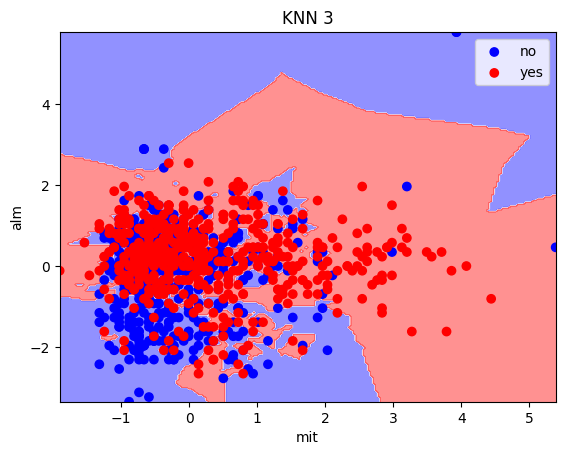

In [28]:
from sklearn.inspection import DecisionBoundaryDisplay

xx0, xx1 = np.meshgrid(np.linspace(min(train_X[FEAT1]), max(train_X[FEAT1]), 200), np.linspace(min(train_X[FEAT2]), max(train_X[FEAT2]), 200))
grid = np.vstack([xx0.ravel(), xx1.ravel()]).T
y_pred = knn3_clf.predict(grid).reshape(xx0.shape)

disp = DecisionBoundaryDisplay(xx0=xx0, xx1=xx1, response=y_pred, xlabel=FEAT1, ylabel=FEAT2)
disp.plot(alpha=0.5, cmap='bwr')

disp.ax_.scatter(train_X[train_y==0][FEAT1], train_X[train_y==0][FEAT2], c=[0 for _ in range(len(train_X[train_y==0]))], label='no', cmap='bwr', vmin=0, vmax=1)
disp.ax_.scatter(train_X[train_y==1][FEAT1], train_X[train_y==1][FEAT2], c=[1 for _ in range(len(train_X[train_y==1]))], label='yes', cmap='bwr', vmin=0, vmax=1)


disp.ax_.legend()
disp.ax_.set_title('KNN 3')

/home/gmatiukhin/Study/year4/data-mining/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'KNN 5')

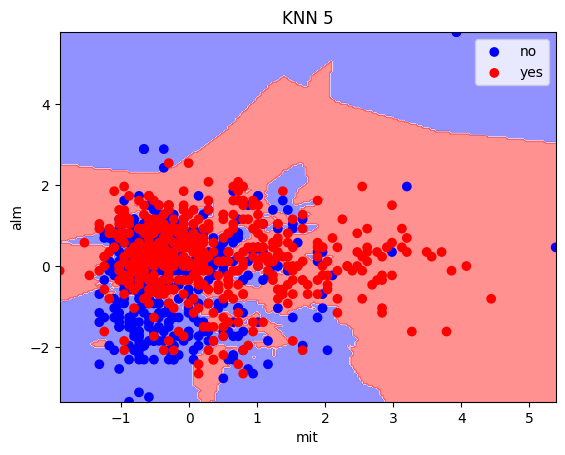

In [29]:
from sklearn.inspection import DecisionBoundaryDisplay

xx0, xx1 = np.meshgrid(np.linspace(min(train_X[FEAT1]), max(train_X[FEAT1]), 200), np.linspace(min(train_X[FEAT2]), max(train_X[FEAT2]), 200))
grid = np.vstack([xx0.ravel(), xx1.ravel()]).T
y_pred = knn5_clf.predict(grid).reshape(xx0.shape)

disp = DecisionBoundaryDisplay(xx0=xx0, xx1=xx1, response=y_pred, xlabel=FEAT1, ylabel=FEAT2)
disp.plot(alpha=0.5, cmap='bwr')

disp.ax_.scatter(train_X[train_y==0][FEAT1], train_X[train_y==0][FEAT2], c=[0 for _ in range(len(train_X[train_y==0]))], label='no', cmap='bwr', vmin=0, vmax=1)
disp.ax_.scatter(train_X[train_y==1][FEAT1], train_X[train_y==1][FEAT2], c=[1 for _ in range(len(train_X[train_y==1]))], label='yes', cmap='bwr', vmin=0, vmax=1)


disp.ax_.legend()
disp.ax_.set_title('KNN 5')

/home/gmatiukhin/Study/year4/data-mining/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'LDA')

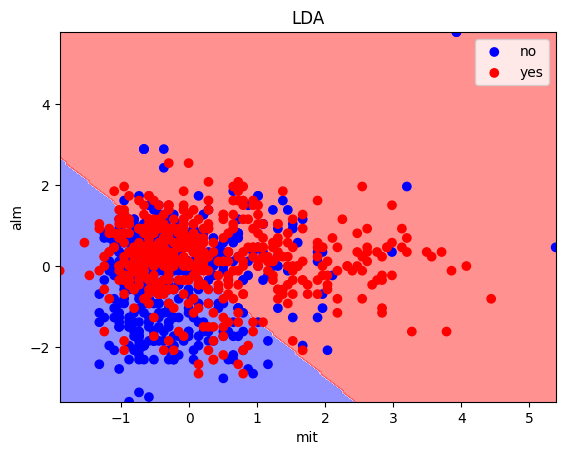

In [30]:
from sklearn.inspection import DecisionBoundaryDisplay

xx0, xx1 = np.meshgrid(np.linspace(min(train_X[FEAT1]), max(train_X[FEAT1]), 200), np.linspace(min(train_X[FEAT2]), max(train_X[FEAT2]), 200))
grid = np.vstack([xx0.ravel(), xx1.ravel()]).T
y_pred = lda.predict(grid).reshape(xx0.shape)

disp = DecisionBoundaryDisplay(xx0=xx0, xx1=xx1, response=y_pred, xlabel=FEAT1, ylabel=FEAT2)
disp.plot(alpha=0.5, cmap='bwr')

disp.ax_.scatter(train_X[train_y==0][FEAT1], train_X[train_y==0][FEAT2], c=[0 for _ in range(len(train_X[train_y==0]))], label='no', cmap='bwr', vmin=0, vmax=1)
disp.ax_.scatter(train_X[train_y==1][FEAT1], train_X[train_y==1][FEAT2], c=[1 for _ in range(len(train_X[train_y==1]))], label='yes', cmap='bwr', vmin=0, vmax=1)


disp.ax_.legend()
disp.ax_.set_title("LDA")

## 9. ROC-кривые

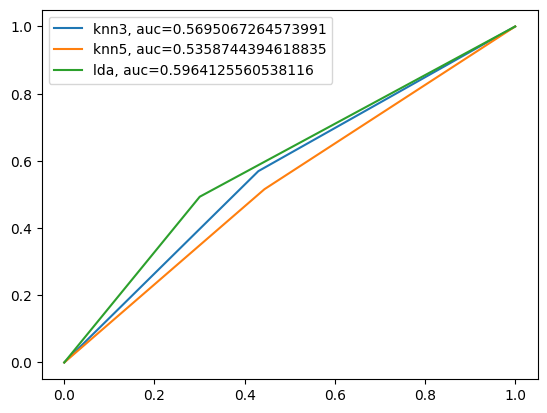

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

scores = dict()

decision_scores = knn3_clf.predict(test_X)
fprs, tprs, thresholds = roc_curve(test_y, decision_scores)
score = roc_auc_score(test_y, decision_scores)
plt.plot(fprs, tprs, label=f"knn3, auc={score}")
scores["knn3"] = score

decision_scores = knn5_clf.predict(test_X)
fprs, tprs, thresholds = roc_curve(test_y, decision_scores)
score = roc_auc_score(test_y, decision_scores)
plt.plot(fprs, tprs, label=f"knn5, auc={score}")
scores["knn5"] = score

decision_scores = lda.predict(test_X)
fprs, tprs, thresholds = roc_curve(test_y, decision_scores)
score = roc_auc_score(test_y, decision_scores)
scores["lda"] = score

plt.plot(fprs, tprs, label=f"lda, auc={score}")
plt.legend()

In [32]:
print("Scores:")
for (k,v) in scores.items():
    print(f"{k}: {v}")
print(f"Best: {max(scores, key=scores.get)}")

Scores:
knn3: 0.5695067264573991
knn5: 0.5358744394618835
lda: 0.5964125560538116
Best: lda
